# Validation of the tSZ effect

## Comparison of the tSZ effect against analytical expressions
In this notebook, we will start by comparing the tSZ signal from `MockSZ` with linearised expressions from [Birkinshaw, 1999](https://ned.ipac.caltech.edu/level5/Birkinshaw/Birk3_4.html), valid for $T_\mathrm{e}$ < 20 KeV. For this, we compare the dimensionless frequencies $x = \frac{h \nu}{k_\mathrm{B} T_\mathrm{CMB}}$ at which the tSZ signal has a minimum, null and maximum to the linearised equations and calculate the percentage error. Note that, since the linearised equations are functions of the dimensionless temperature $\Theta = \frac{k_\mathrm{B} T_\mathrm{e}}{m_\mathrm{e} c^2}$, we convert the electron temperature. Also, to see how much $T_\mathrm{e}$ > 20 KeV deviates, we increase the range up to 25 keV

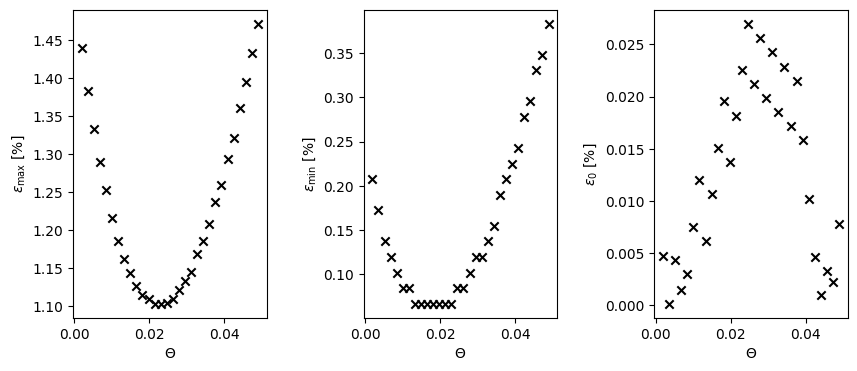

In [2]:
import matplotlib
import os

import numpy as np
import matplotlib.pyplot as pt

import MockSZ.Models as MModels
import MockSZ.Conversions as MConv

%matplotlib inline


Te = np.linspace(1, 25, 30)

numin = 120
numax = 460

tau_e = 0.01
num_arr = 15000
nu = np.linspace(numin, numax, num=num_arr) * 1e9

xmin = []
x0 = []
xmax =[]

for i in Te:
    simObj = MModels.SinglePointing(i, tau_e=tau_e, no_CMB=True)
    tSZ = simObj.getSingleSignal_tkSZ(nu)

    xmin.append(MConv.freq_x(nu[np.argmin(tSZ)]))
    xmax.append(MConv.freq_x(nu[np.argmax(tSZ)]))
    x0.append(MConv.freq_x(nu[np.argmin(np.absolute(tSZ))]))

xmin = np.array(xmin)
xmax = np.array(xmax)
x0 = np.array(x0)

theta = MConv.keV_theta(Te)

theta_test = np.linspace(theta[0],theta[-1],num=num_arr)

xmax_theo = 6.61 * (1 + 2.15*theta_test)
xmin_theo = 2.26 * np.ones(num_arr)
x0_theo = 3.83 * (1 + 1.13*theta_test)

errs_max = np.absolute(6.61 * (1 + 2.15*theta) - xmax) / xmax * 100
errs_min = np.absolute(2.26 - xmin)/ xmin * 100
errs_0 = np.absolute(3.83 * (1 + 1.13*theta) - x0) / x0 * 100

fig, ax = pt.subplots(1,3, figsize=(10, 4), gridspec_kw={"wspace":0.5})
ax[0].scatter(theta, errs_max, c="k", marker="x")
ax[0].set_ylabel(r"$\epsilon_\mathrm{max}$ [%]")
ax[0].set_xlabel(r"$\Theta$")

ax[1].scatter(theta, errs_min, c="k", marker="x")
ax[1].set_ylabel(r"$\epsilon_\mathrm{min}$ [%]")
ax[1].set_xlabel(r"$\Theta$")

ax[2].scatter(theta, errs_0, c="k", marker="x")
ax[2].set_ylabel(r"$\epsilon_0$ [%]")
ax[2].set_xlabel(r"$\Theta$")

pt.show()

We can immediately see that there is some deviation, especially for the frequency at which the maximum occurs. However, the error over the entire range is not larger than 1.5%, meaning the deviation is not big. When we look at the frequency at which the minimum occurs, the error is much smaller. The error decreases even further looking at the frequency at which the null occurs.